In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('gurgaon-cleaned-2.csv')

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
0,flat,signature global park,sohna road,0.90,8036.0,1120.0,Built Up area: 1120 (104.05 sq.m.),3,2,0,2.0,NaN,Undefined,NaN,1120.0,NaN,0,0,0,0,0,0,58
1,flat,m3m skywalk,sector 74,2.25,13636.0,1650.0,Super Built up area 2038(189.34 sq.m.)Built Up...,3,3,2,9.0,South,Relatively New,2038.0,1938.0,1650.0,1,0,0,0,0,1,174


## price

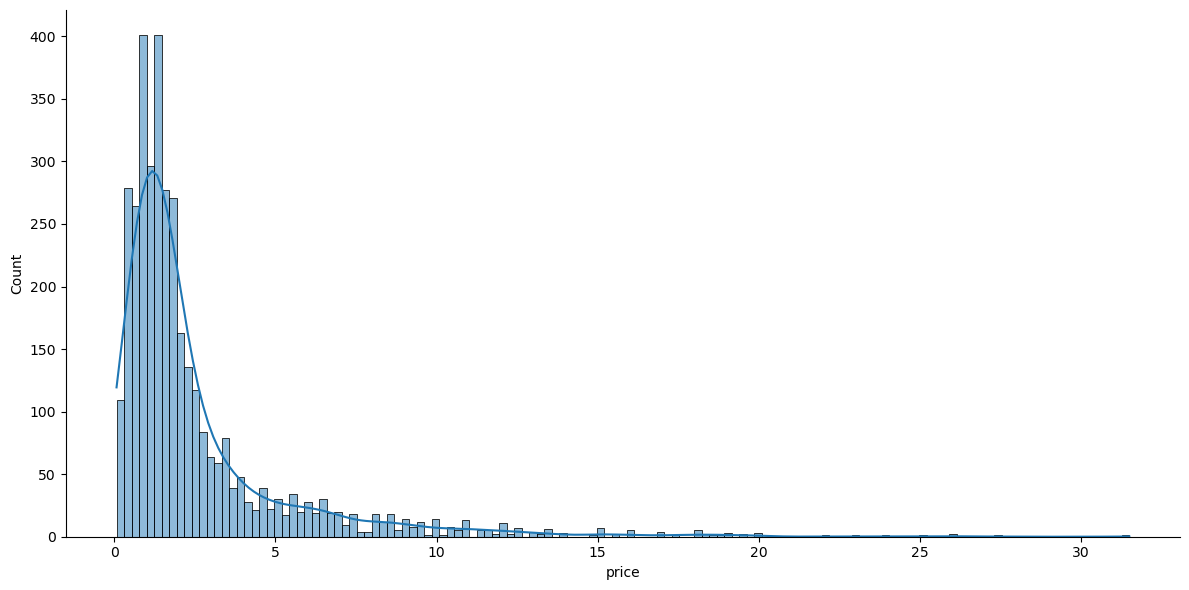

In [33]:
sns.displot(df['price'], kde = True, height = 6, aspect = 2)
plt.show()

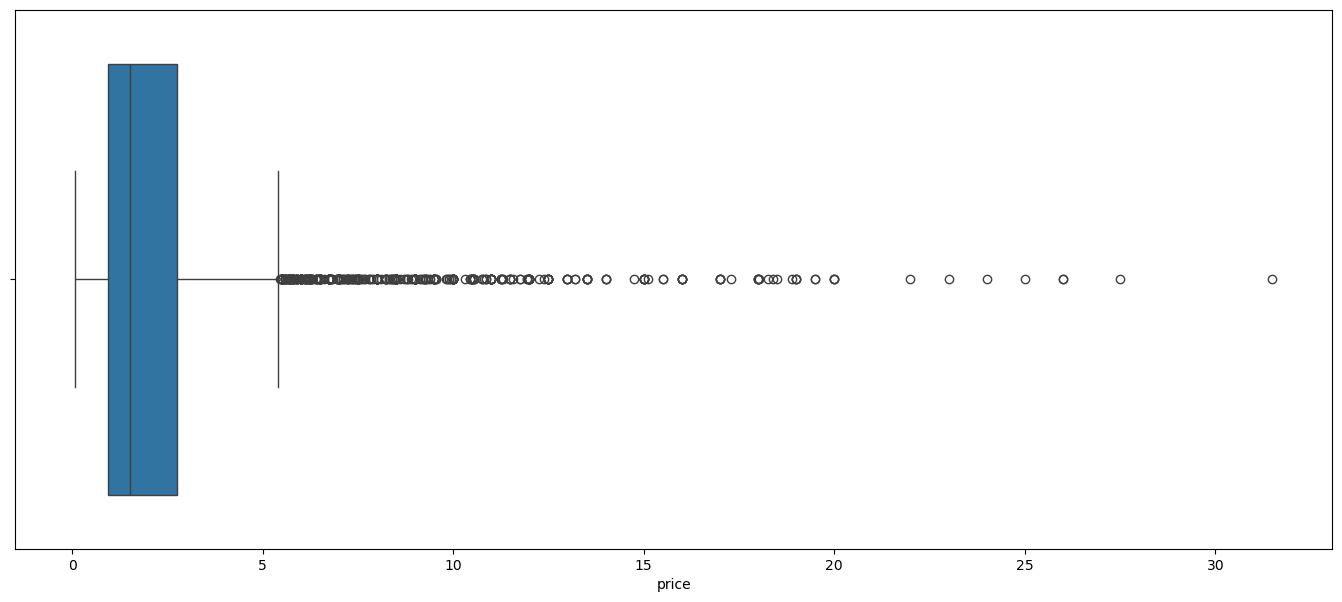

In [39]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['price'])
plt.show()

In [53]:
# calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# define bounds 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# filter data on the based of defined bounds
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
# display the outliers stats
outlier_stats = outliers['price'].describe()

outlier_stats

count    426.000000
mean       9.229202
std        4.062636
min        5.460000
25%        6.470000
50%        8.000000
75%       10.702500
max       31.500000
Name: price, dtype: float64

In [56]:
outliers.sort_values(by = 'price', ascending = False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
3105,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
1395,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,1,0,1,1,42
784,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
3039,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,1,0,1,1,138
1674,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
762,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,1,0,0,1,122
2859,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
255,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,1,0,0,0,0,0,54
3460,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,1,0,1,0,0,2,97
3478,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,1,0,0,0,0,1,31


on the basis of price cols, we can say some are genuine errors and some are data error

## price_per_sqft

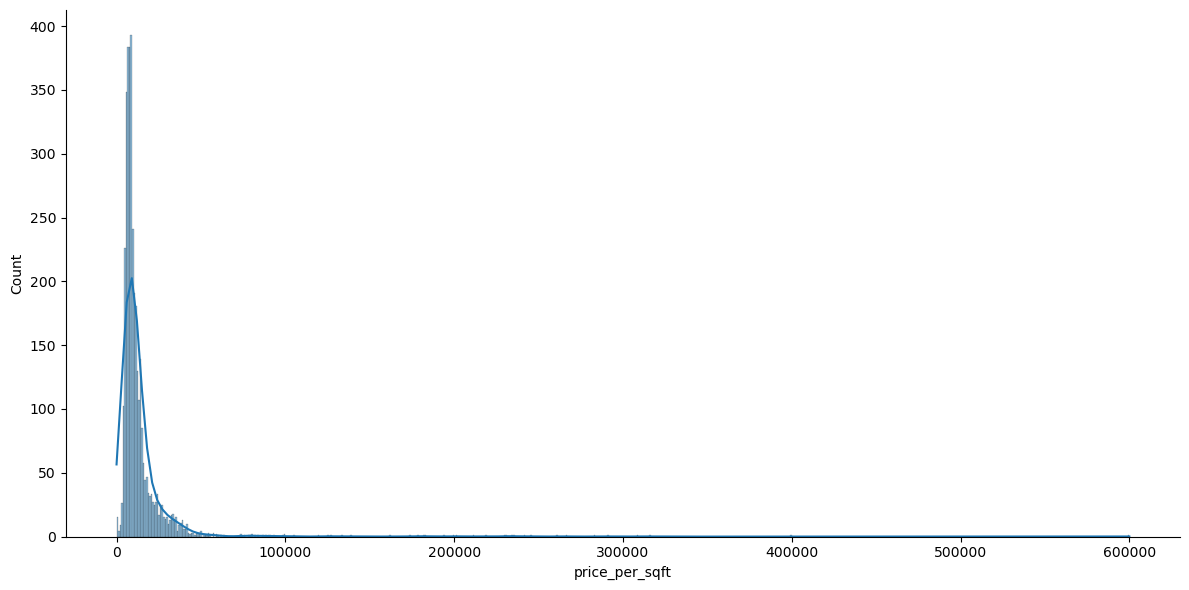

In [60]:
sns.displot(df['price_per_sqft'], kde = True, height = 6, aspect = 2)
plt.show()

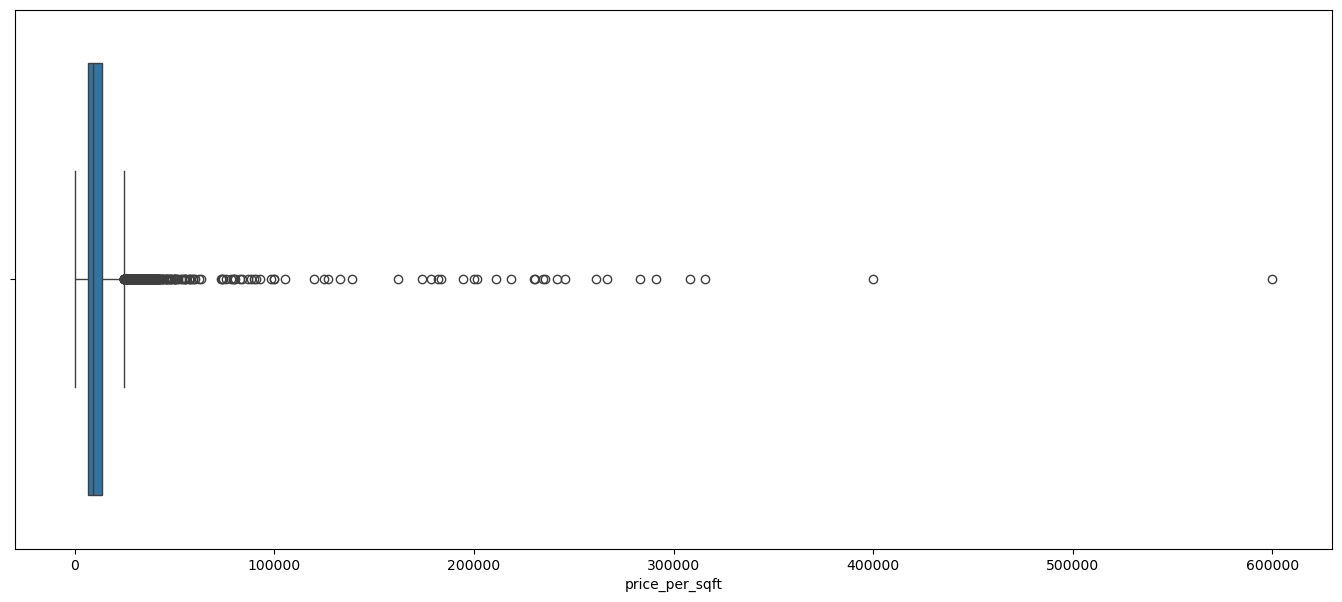

In [58]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['price_per_sqft'])
plt.show()

In [63]:
# calculate IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
# define bounds 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# filter data on the based of defined bounds
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
# display the outliers stats
outlier_stats_sqft = outliers_sqft['price_per_sqft'].describe()

outlier_stats_sqft

count       354.000000
mean      53053.847458
std       61294.368249
min       24510.000000
25%       28270.250000
50%       33628.500000
75%       42159.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [66]:
outliers_sqft.sort_values(by = 'price_per_sqft', ascending = False).head(30)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
762,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,1,0,0,1,122
3121,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,250.0,NaN,1,1,0,0,0,1,114
1631,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,NaN,1600.0,0,0,0,0,0,0,0
2943,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,3+,5.0,North-West,Relatively New,NaN,60.0,NaN,0,0,0,0,0,0,53
3195,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1,1,1,0,1,1,49
3411,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),3,3,3,1.0,East,Moderately Old,NaN,240.0,NaN,1,0,0,0,0,0,49
2480,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,2.0,North,Relatively New,NaN,300.0,NaN,1,1,1,0,0,0,21
2499,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),4,4,2,2.0,East,Old Property,NaN,402.0,NaN,1,0,1,0,0,1,91
1911,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,3+,5.0,North-West,Relatively New,NaN,145.0,NaN,0,0,0,0,0,2,7
3293,house,independent,sector 56,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),4,4,3+,4.0,East,Relatively New,NaN,60.0,NaN,0,0,0,1,0,0,70


price per sqft is calculated when price is divided by area (sqft). area should be in sqft but here area is in sq yard

In [69]:
# convert area which is in sq yard in sqft
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x * 9 if x < 1000 else x)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_15772\3271010852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x * 9 if x < 1000 else x)


In [73]:
# recalculate price per sqft on the updated area (sqft)
outliers_sqft['price_per_sqft'] = round(outliers_sqft['price']*10000000/outliers_sqft['area'])

C:\Users\Shubham\AppData\Local\Temp\ipykernel_15772\701523487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round(outliers_sqft['price']*10000000/outliers_sqft['area'])


In [74]:
# value reduced
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29224.621469
std      12547.929157
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [75]:
df.update(outliers_sqft)

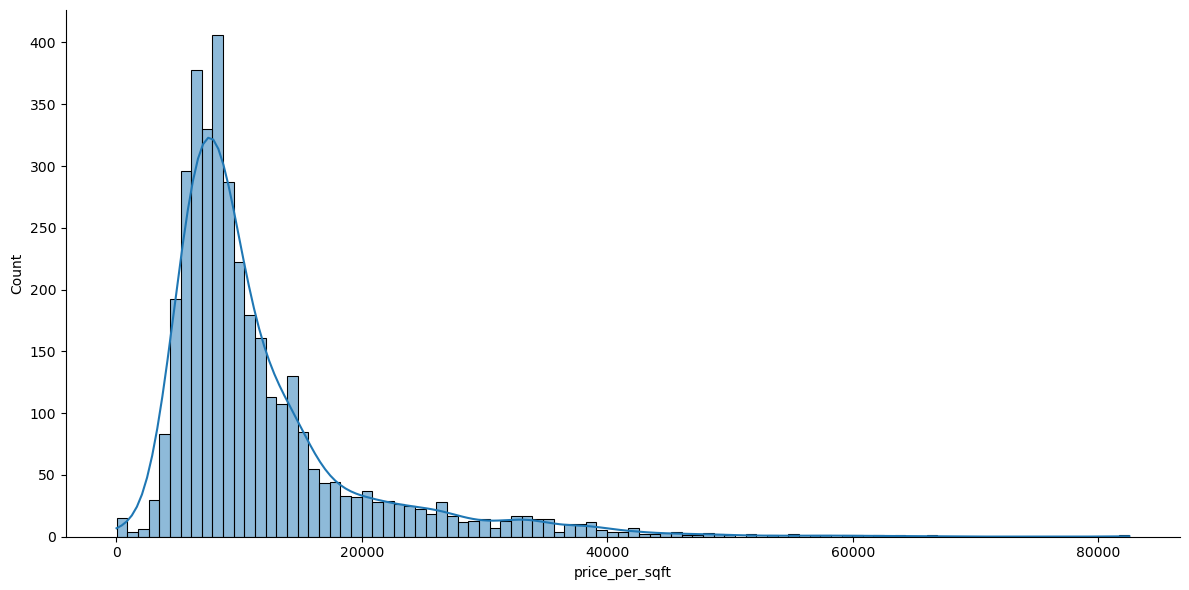

In [76]:
sns.displot(df['price_per_sqft'], kde = True, height = 6, aspect = 2)
plt.show()

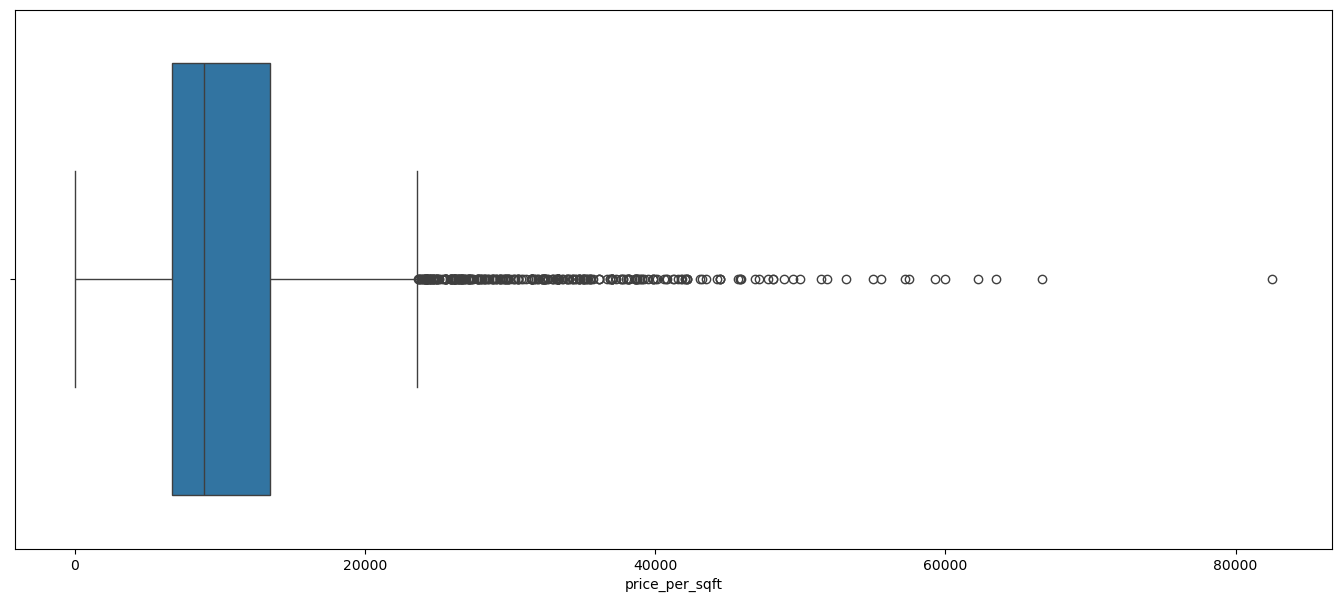

In [77]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['price_per_sqft'])
plt.show()

In [78]:
df[df['price_per_sqft'] > 50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
313,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
419,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,1,0,0,2,75
696,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
762,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,1,0,0,1,122
784,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
829,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,1,0,1,2,137
949,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160
1041,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,1,103
2843,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,1,153
2896,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0


In [80]:
df[df['price_per_sqft'] > 50000].shape[0]

13

In [82]:
# drop those 13 col considering as outliers
df = df[df['price_per_sqft'] <= 50000]

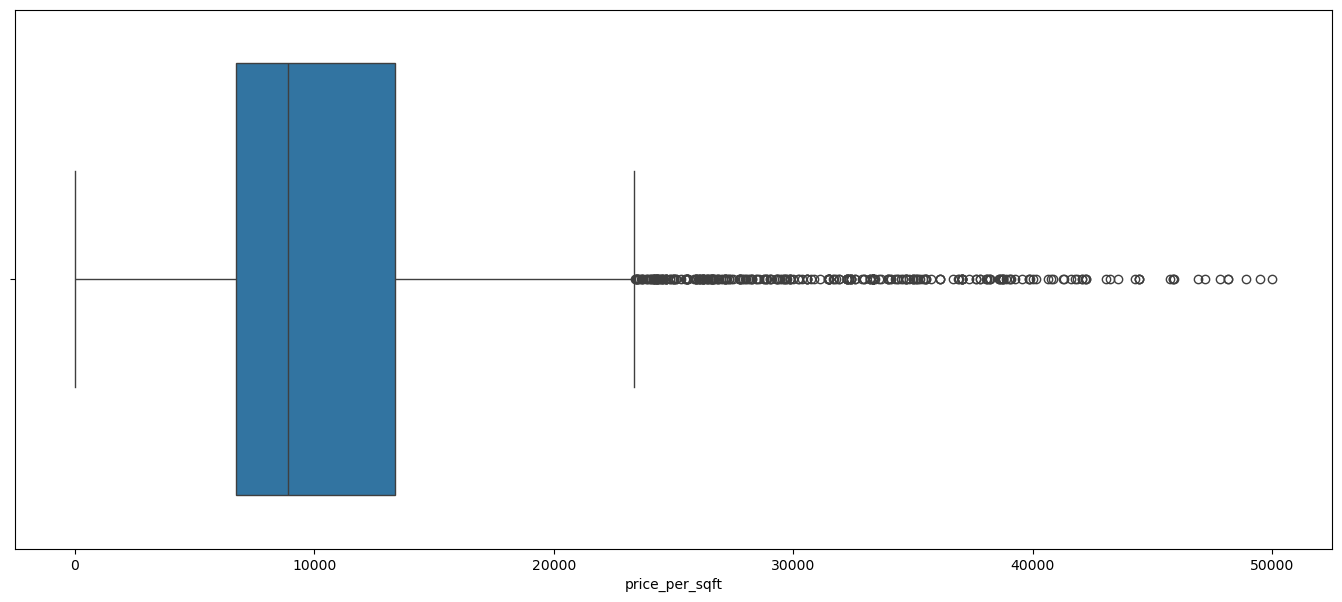

In [83]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['price_per_sqft'])
plt.show()

## area

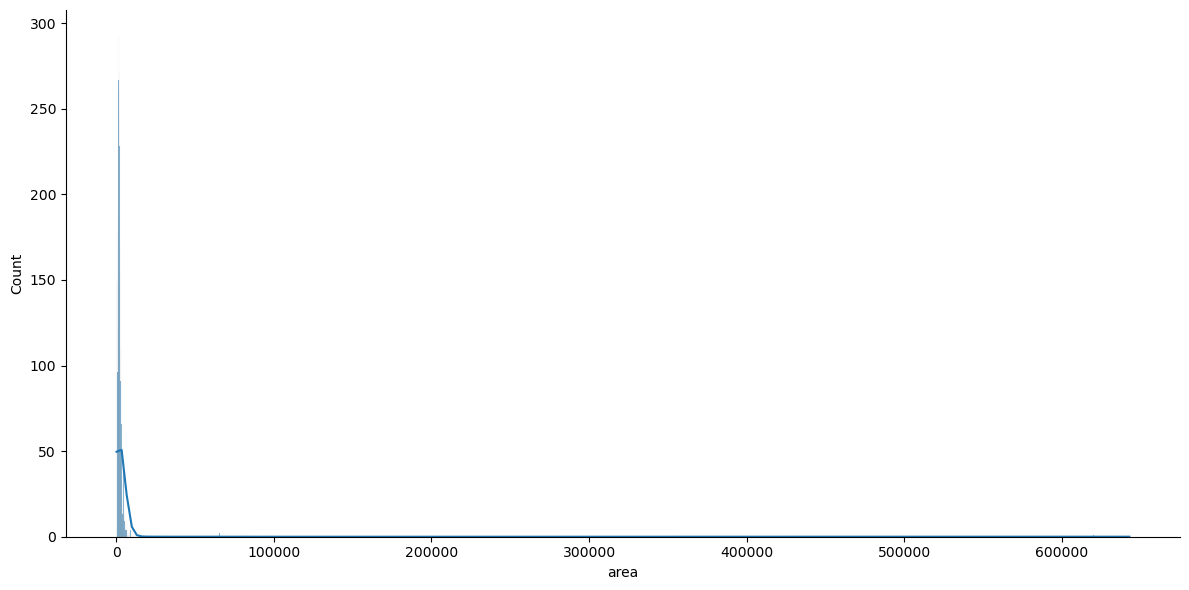

In [85]:
sns.displot(df['area'], kde = True, height = 6, aspect = 2)
plt.show()

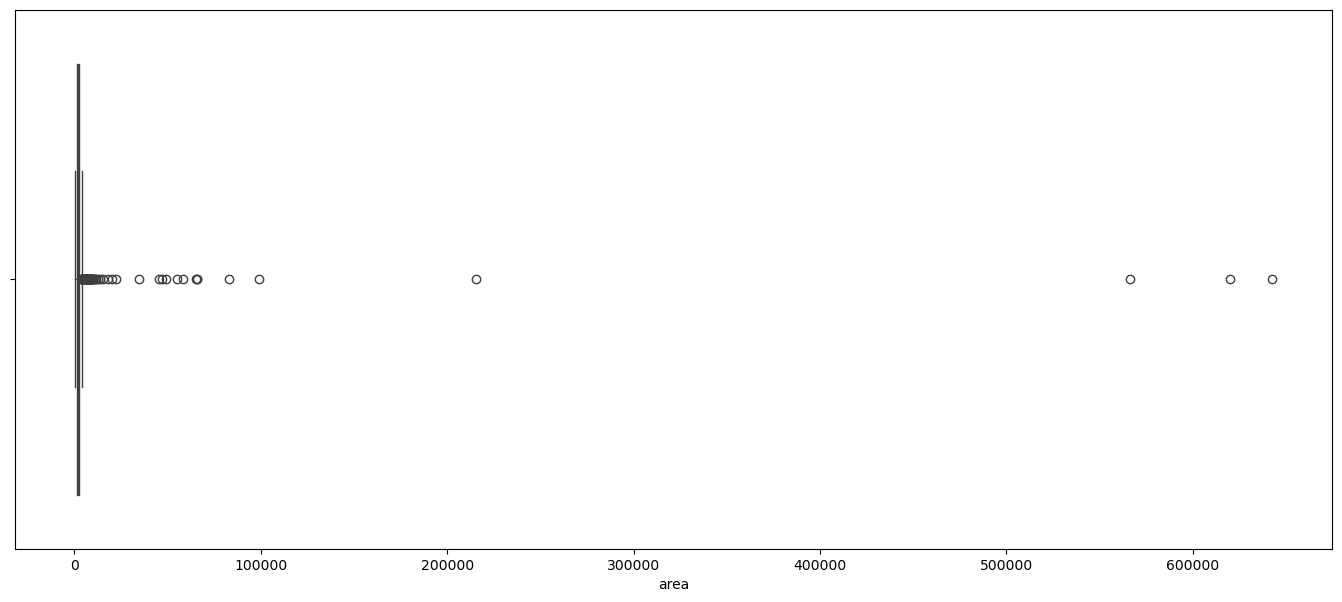

In [86]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['area'])
plt.show()

extreme outliers as the graphs show data is fully right skewed

In [87]:
df['area'].describe()

count      3657.000000
mean       2705.527755
std       18140.845847
min         145.000000
25%        1261.000000
50%        1750.000000
75%        2343.000000
max      642857.000000
Name: area, dtype: float64

In [88]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
314,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
790,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,1,0,1,1,0
1004,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
2898,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,0,1,0,0,1,0,65


prices are less yet the area is very big. considering as a outliers and droping it 

In [90]:
df = df[df['area'] < 100000]

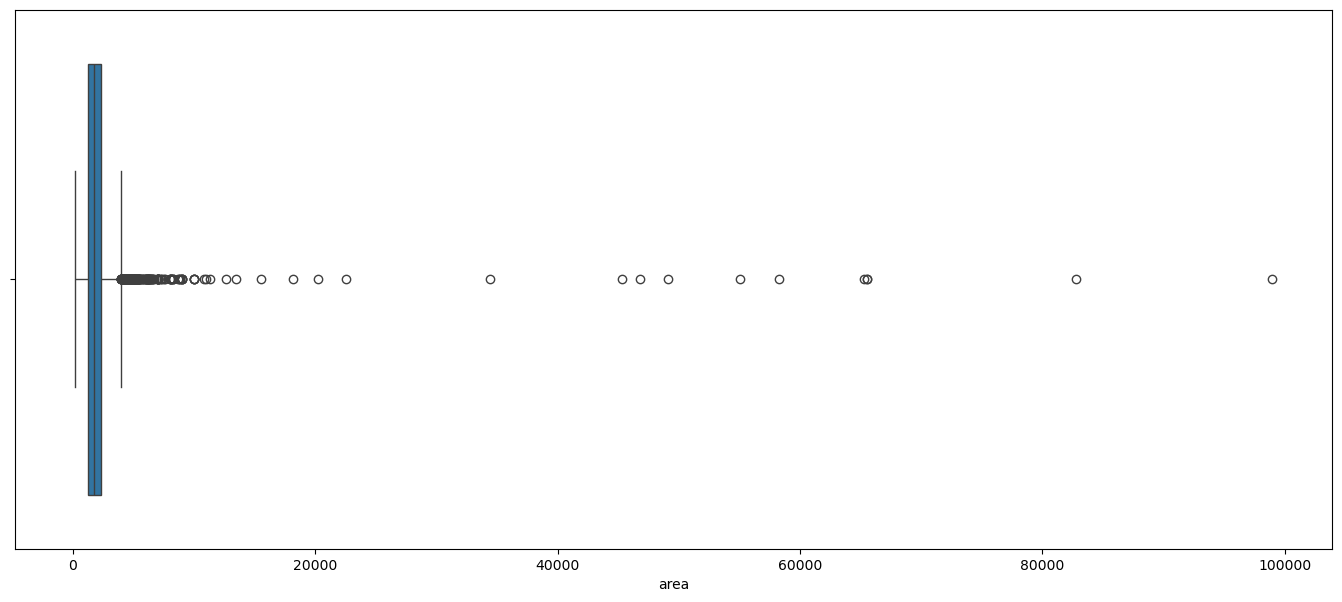

In [91]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['area'])
plt.show()

In [94]:
df[df['area'] > 10000].sort_values(by = 'area', ascending = False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
1846,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,1,0,1,1,0,1,60
2556,house,ganpati heights apartment,sector 11,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
2351,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,0,1,0,0,0,0,15
1934,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
1617,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
405,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
1211,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
273,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,0,1,0,0,0,0,37
1452,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,1,0,0,1,0,1,109
662,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


2351, 1934, 405, 1211, 273, 662, 1441, 3314, these indices highlight outlier properties with data errors, such as incorrect price and bedroom are too less as compared to area

In [96]:
df.drop(index = [2351, 1934, 405, 1211, 273, 662, 1441, 3314], inplace = True)

In [97]:
df[df['area'] > 10000].sort_values(by = 'area', ascending = False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
1846,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,1,0,1,1,0,1,60
2556,house,ganpati heights apartment,sector 11,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1617,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1452,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,1,0,0,1,0,1,109
1581,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,1,0,0,0,0,1,61
1917,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,1,0,1,1,123
1113,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,0,1,1,0,1,1,44
3666,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,1,0,0,0,0,0,160
1288,flat,godrej icon,sector 88,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
1395,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,1,0,1,1,42


In [98]:
# Correcting incorrect 'area' data with their built-up/carpet areas
df.loc[2556, 'area'] = 115*9
df.loc[1617, 'area'] = 7250
df.loc[1452, 'area'] = 5800
df.loc[1581, 'area'] = 2660
df.loc[1917, 'area'] = 2850
df.loc[1113, 'area'] = 1812
df.loc[3666, 'area'] = 2160
df.loc[1288, 'area'] = 1175

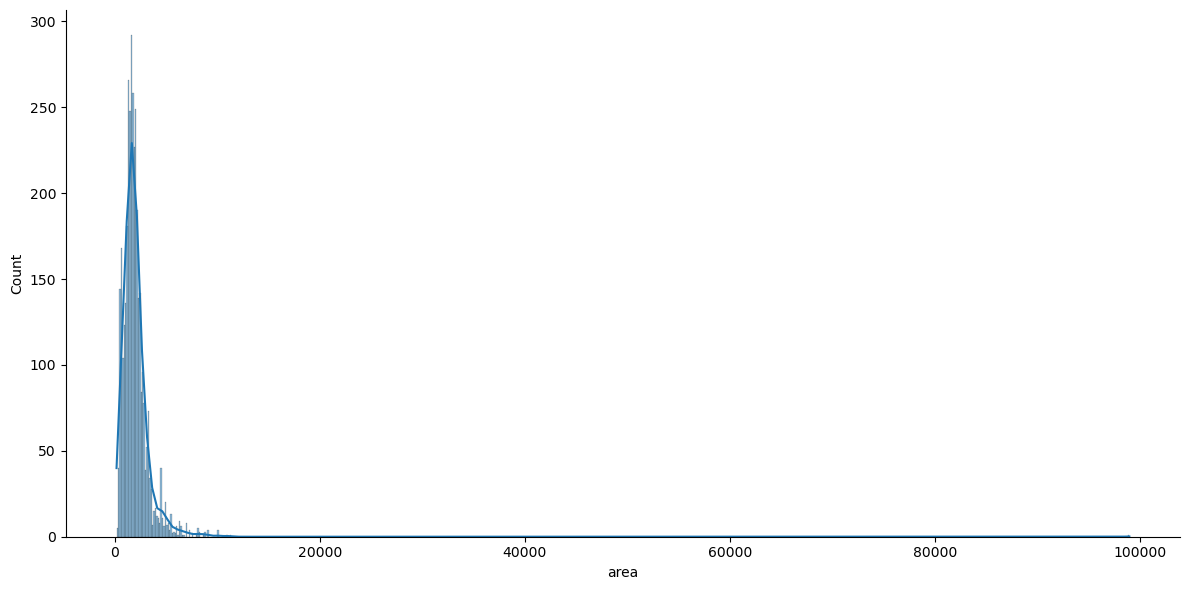

In [99]:
sns.displot(df['area'], kde = True, height = 6, aspect = 2)
plt.show()

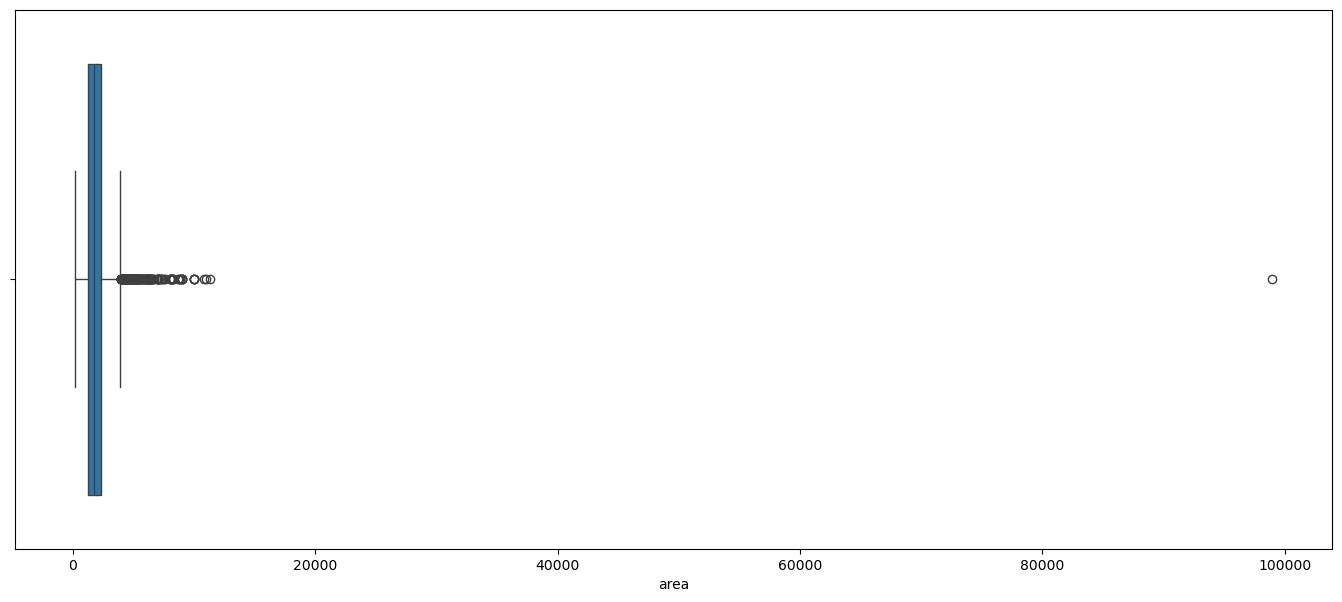

In [100]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['area'])
plt.show()

In [101]:
df[df['area'] > 10000].sort_values(by = 'area', ascending = False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
1846,house,independent,sector 26,18.4,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,1,0,1,1,0,1,60
1395,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,1,0,1,1,42
2412,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,1,0,0,0,0,0,60
31,house,independent,sohna road,5.5,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3,3,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1,1,1,0,1,0,49


remove index 1846 identified as outliers as area is 98000+

In [103]:
df.drop(index = 1846, inplace = True)

In [104]:
df['area'].describe()

count     3644.000000
mean      1949.619649
std       1215.900119
min        145.000000
25%       1260.000000
50%       1745.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

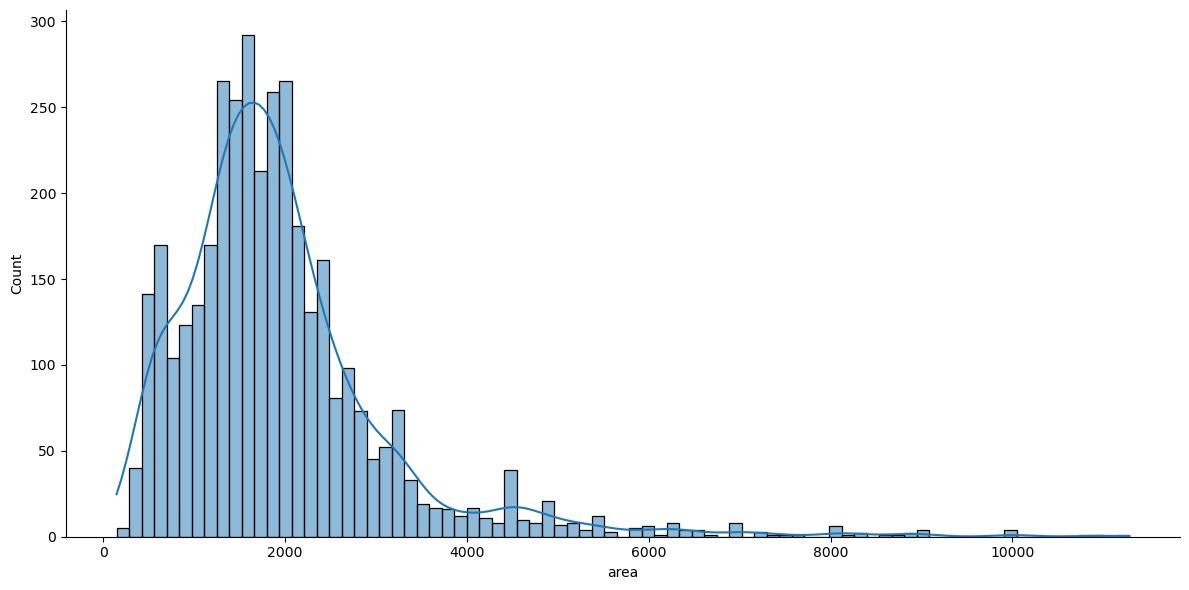

In [105]:
sns.displot(df['area'], kde = True, height = 6, aspect = 2)
plt.show()

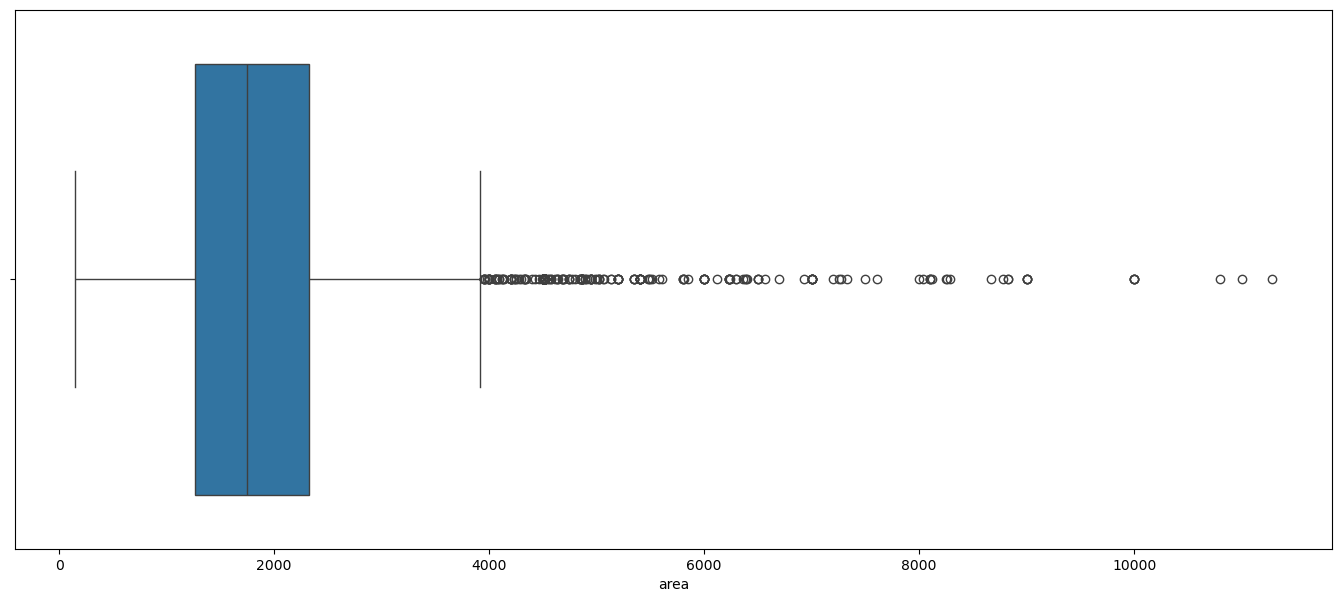

In [106]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['area'])
plt.show()

In [113]:
# improved
df['area'].describe()

count     3644.000000
mean      1949.619649
std       1215.900119
min        145.000000
25%       1260.000000
50%       1745.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

## bedroom

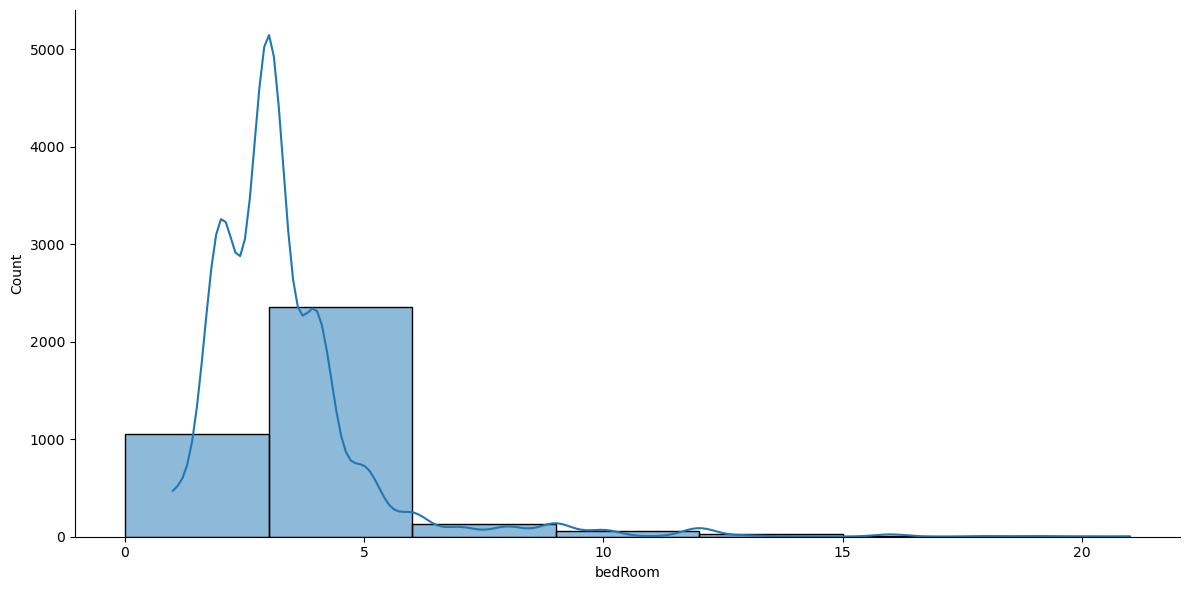

In [117]:
custom_bins = [0, 3, 6, 9, 12, 15, 18, 21]
sns.displot(df['bedRoom'], kde = True, height = 6, aspect = 2, bins = custom_bins)
plt.show()

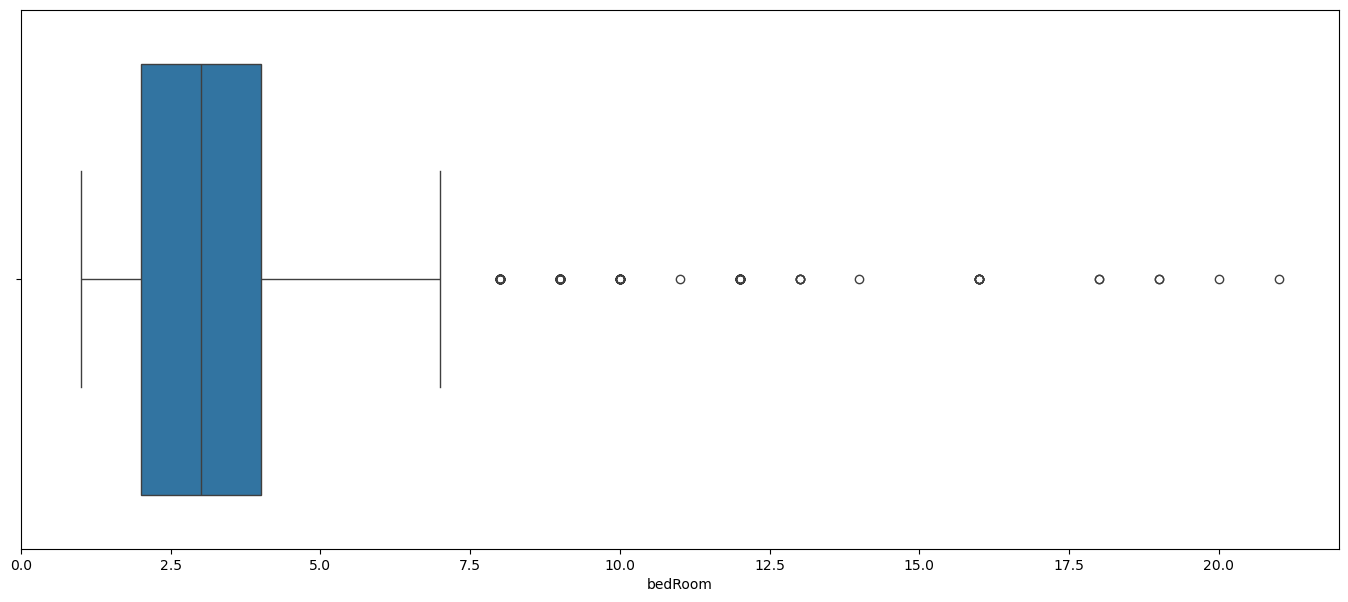

In [120]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['bedRoom'])
plt.show()

In [121]:
df['bedRoom'].describe()

count    3644.000000
mean        3.333699
std         1.828363
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [126]:
df[df['bedRoom'] > 10].sort_values(by = 'bedRoom', ascending = False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
2122,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,1,0,0,0,0,2,49
3341,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,1,0,0,0,0,2,22
3030,house,independent,sector 17,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,0,1,0,1,0,0,68
2335,house,independent,sector 17,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
848,house,independent,sector 76,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,1,0,0,0,0,2,70
1756,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
3417,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,1,0
3294,house,independent,sector 56,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,1,0,1,0,0,1,49
3478,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,1,0,0,0,0,1,31
329,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,1,20


In [128]:
df = df[df['bedRoom'] <= 10]

In [129]:
df.shape

(3599, 23)

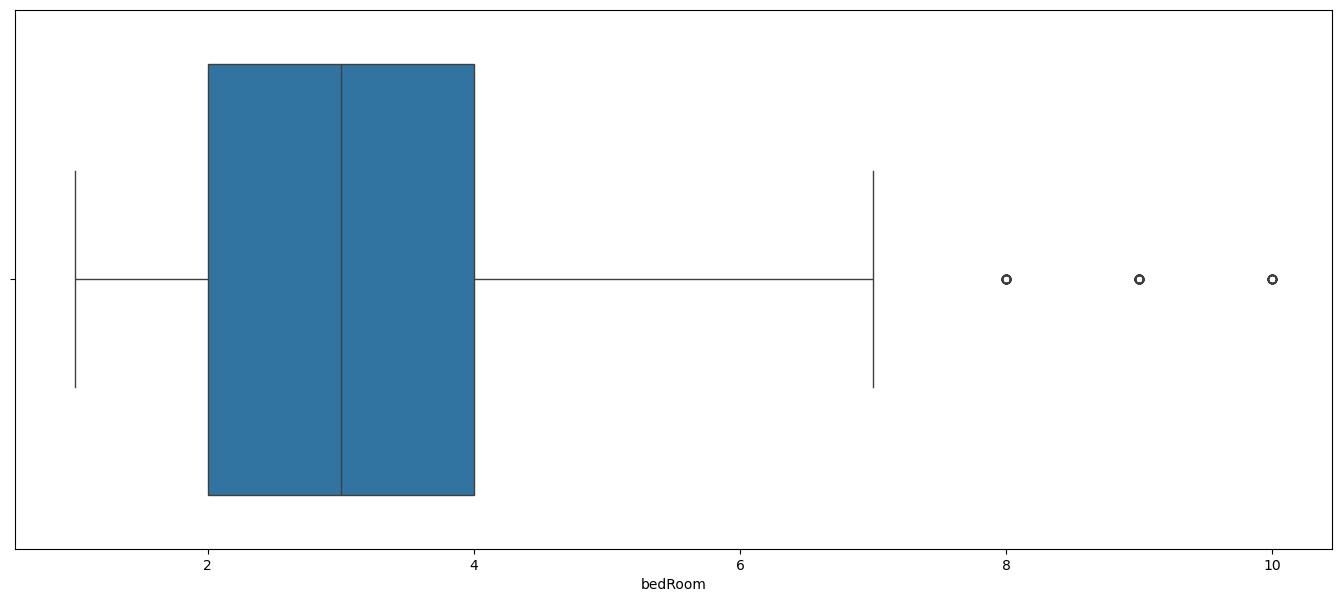

In [130]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['bedRoom'])
plt.show()

In [131]:
df['bedRoom'].describe()

count    3599.000000
mean        3.204223
std         1.393315
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

## bathroom

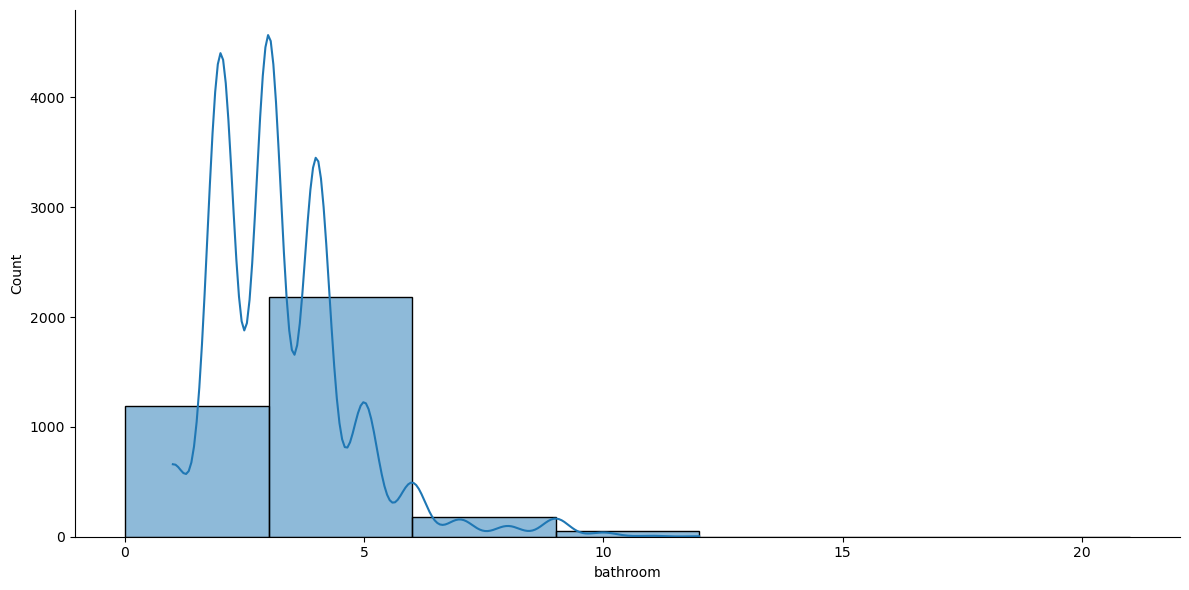

In [132]:
custom_bins = [0, 3, 6, 9, 12, 15, 18, 21]
sns.displot(df['bathroom'], kde = True, height = 6, aspect = 2, bins = custom_bins)
plt.show()

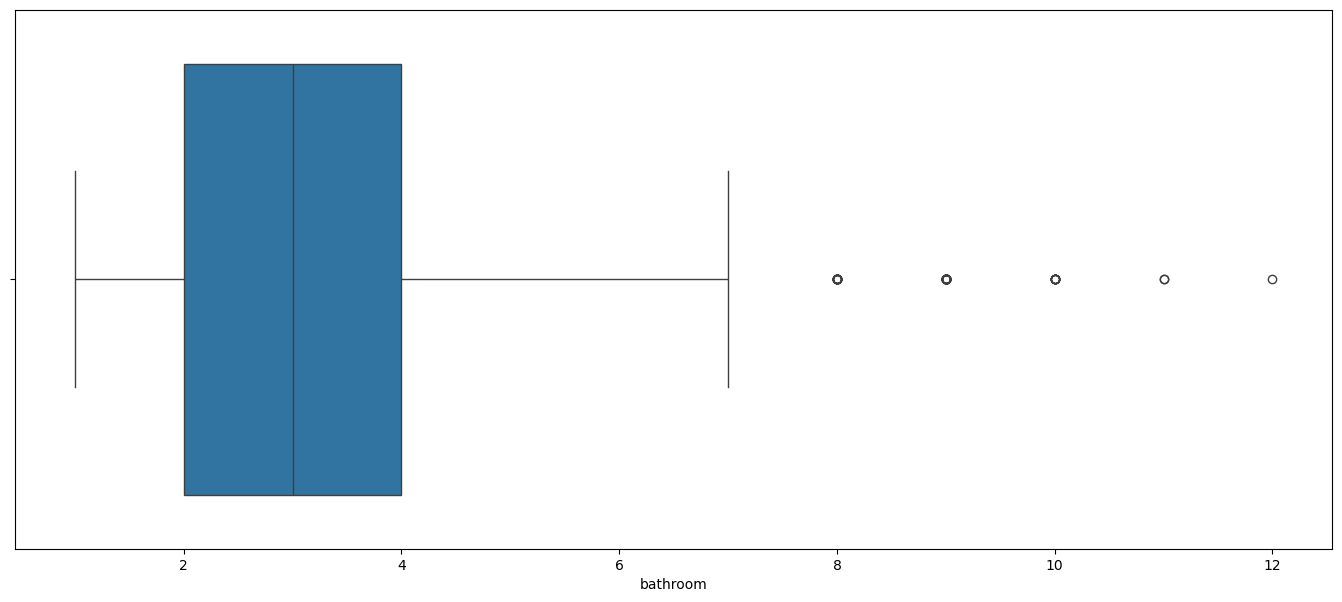

In [134]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['bathroom'])
plt.show()

In [135]:
df['bathroom'].describe()

count    3599.000000
mean        3.271186
std         1.455407
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

In [136]:
df[df['bathroom'] > 10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
1848,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,1,0,1,1,39
2716,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,1,0,0,0,0,1,146
3522,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,1,0,0,2,38


these are genuine outliers not data error

## Super built up area

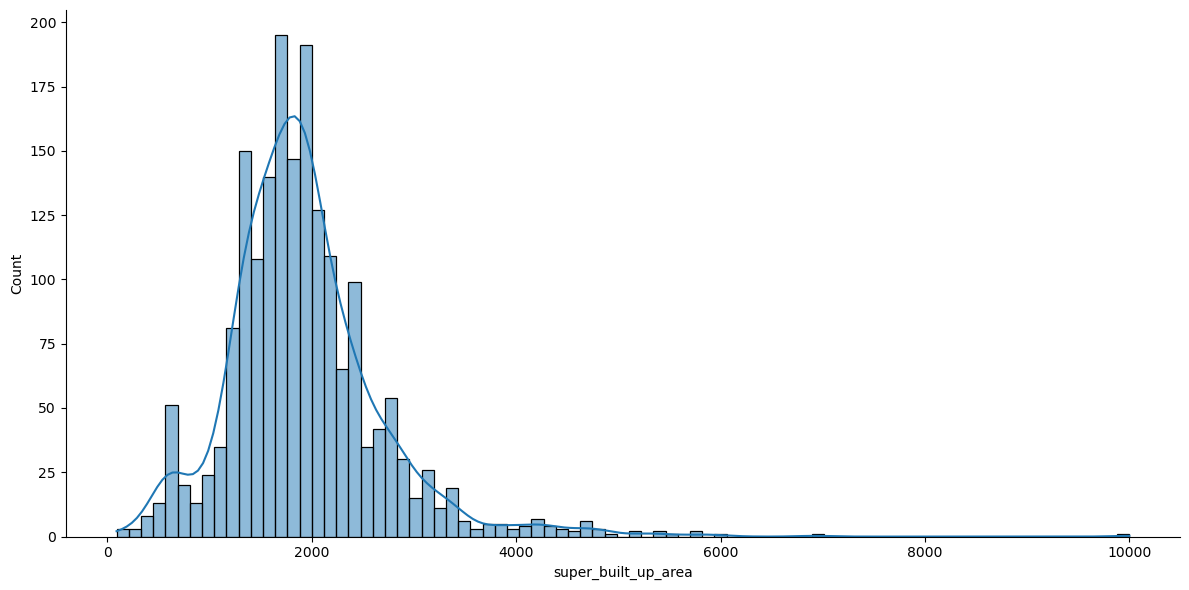

In [138]:
sns.displot(df['super_built_up_area'], kde = True, height = 6, aspect = 2)
plt.show()

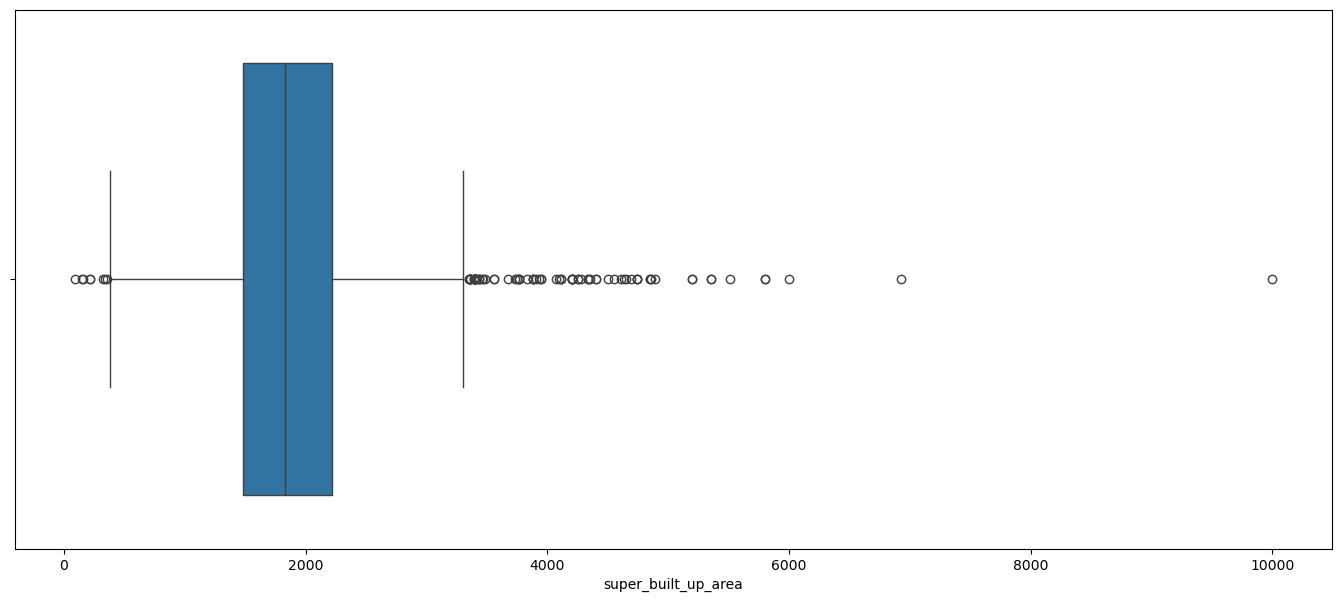

In [139]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['super_built_up_area'])
plt.show()

In [140]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.104771
std        764.371152
min         89.000000
25%       1477.250000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [141]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
177,flat,krrish provence estate,sector 54,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,1,0,1,0,1,0,49
1168,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,1,0,0,0,0,1,140


correct data

## built up area

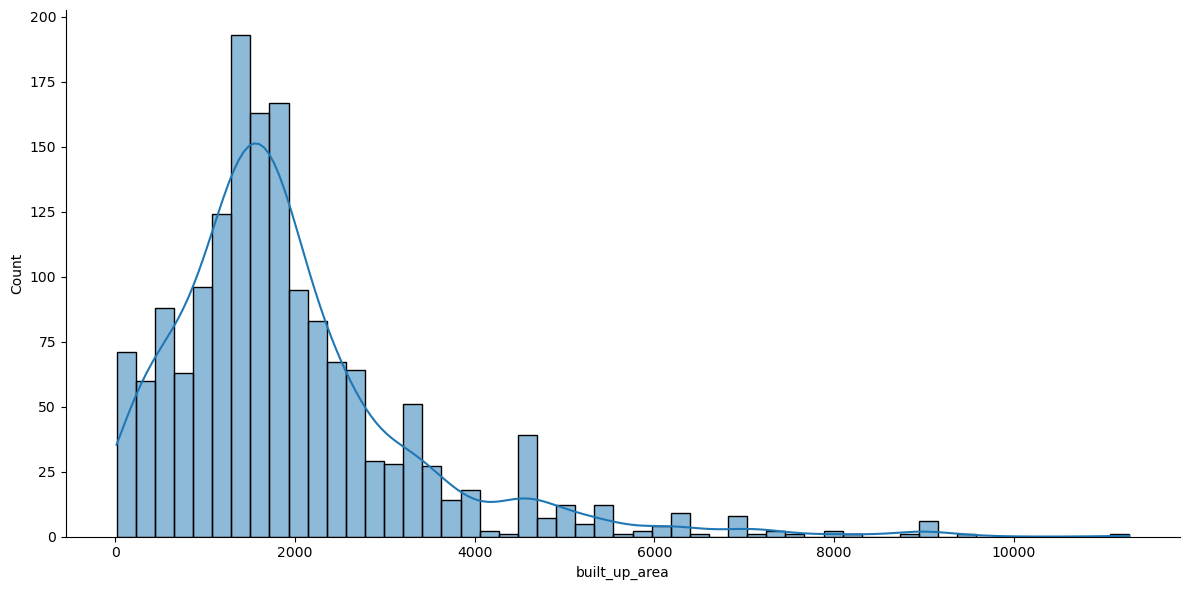

In [142]:
sns.displot(df['built_up_area'], kde = True, height = 6, aspect = 2)
plt.show()

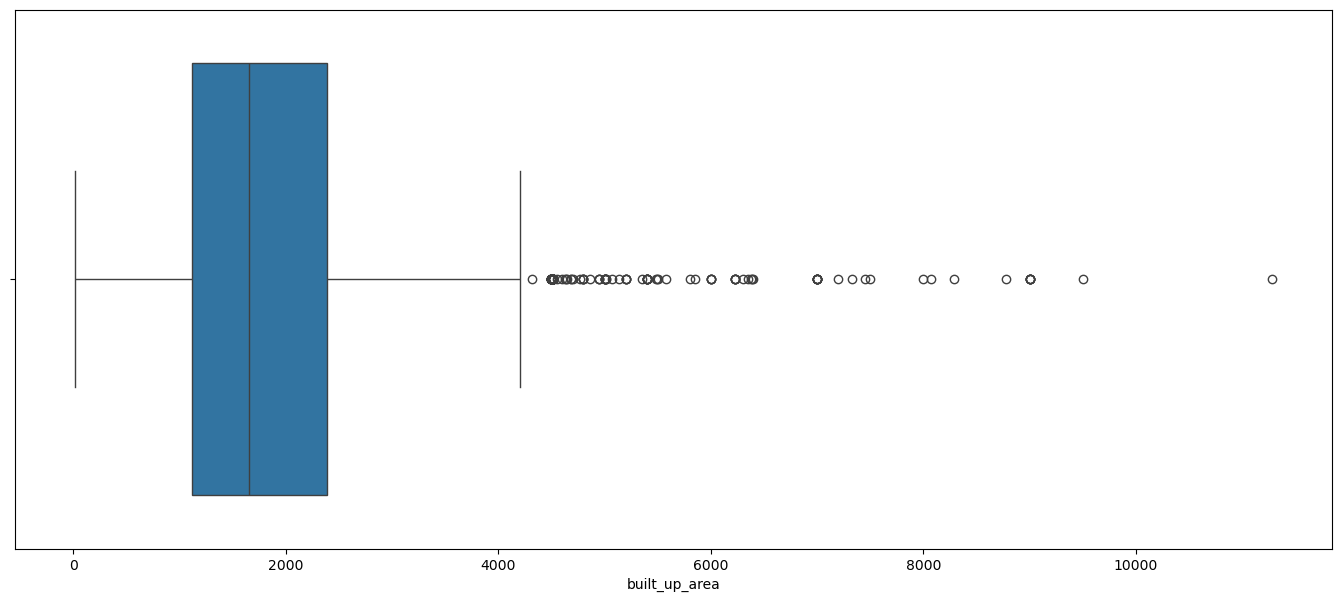

In [143]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['built_up_area'])
plt.show()

In [144]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
1395,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,1,0,1,1,42


## carpet area

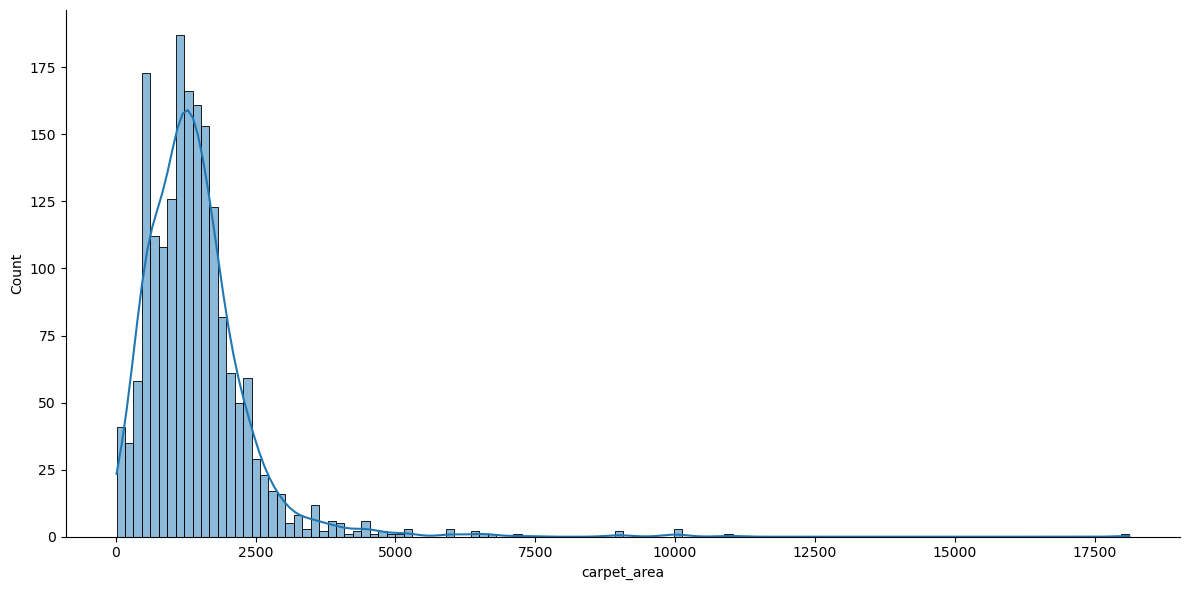

In [148]:
sns.displot(df['carpet_area'], kde = True, height = 6, aspect = 2)
plt.show()

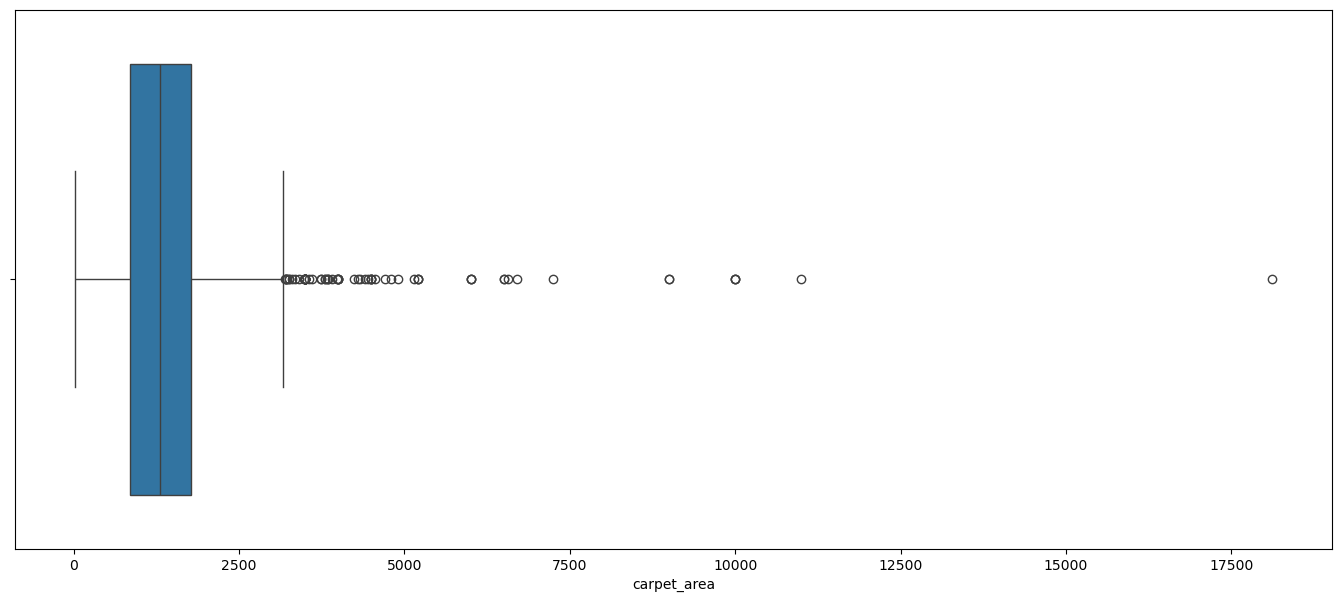

In [149]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['carpet_area'])
plt.show()

In [147]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
1113,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,0,1,1,0,1,1,44
2412,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,1,0,0,0,0,0,60


In [150]:
df.loc[1113, 'carpet_area'] = 1812

In [151]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
2412,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,1,0,0,0,0,0,60


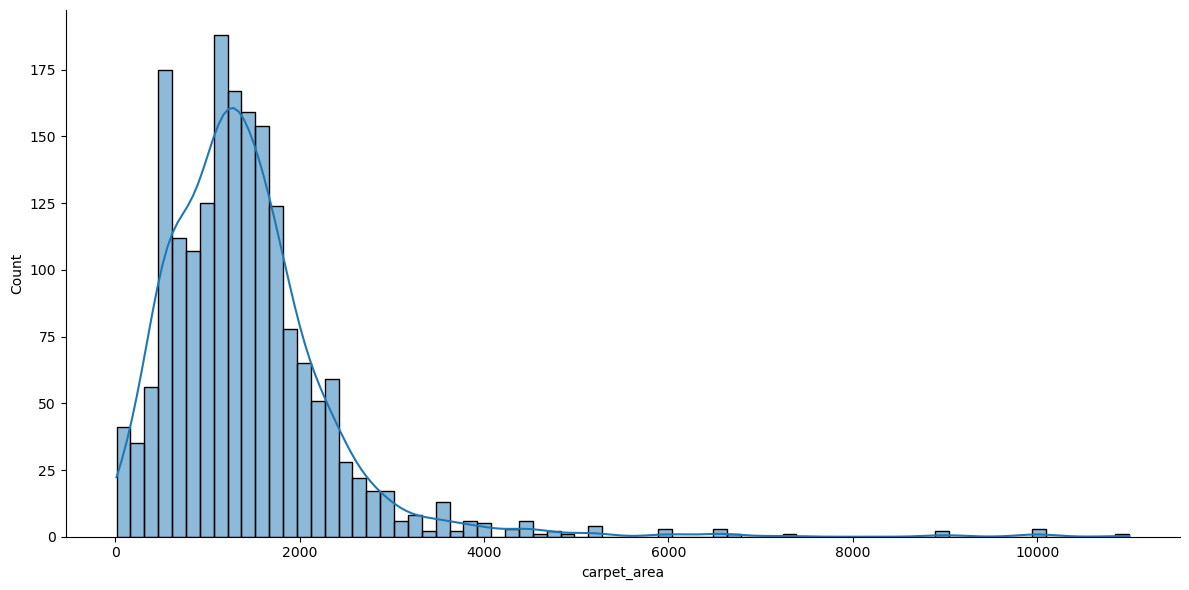

In [152]:
sns.displot(df['carpet_area'], kde = True, height = 6, aspect = 2)
plt.show()

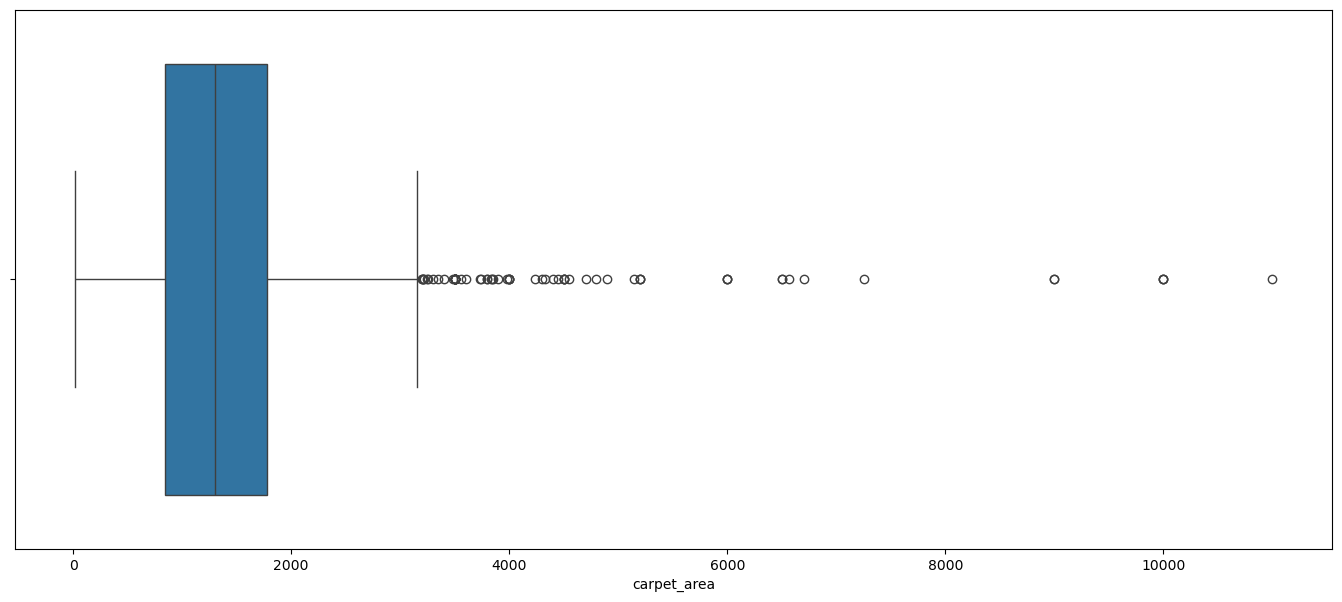

In [153]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['carpet_area'])
plt.show()

## luxury score

In [155]:
df['luxury_score'].describe()

count    3599.000000
mean       71.702139
std        53.242266
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

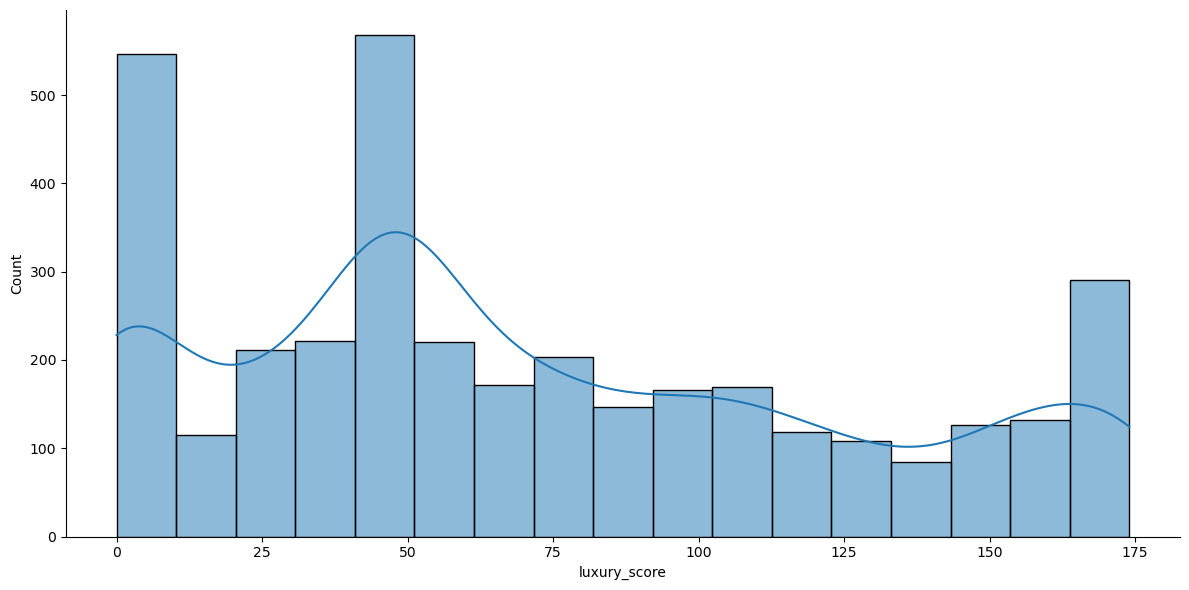

In [156]:
sns.displot(df['luxury_score'], kde = True, height = 6, aspect = 2)
plt.show()

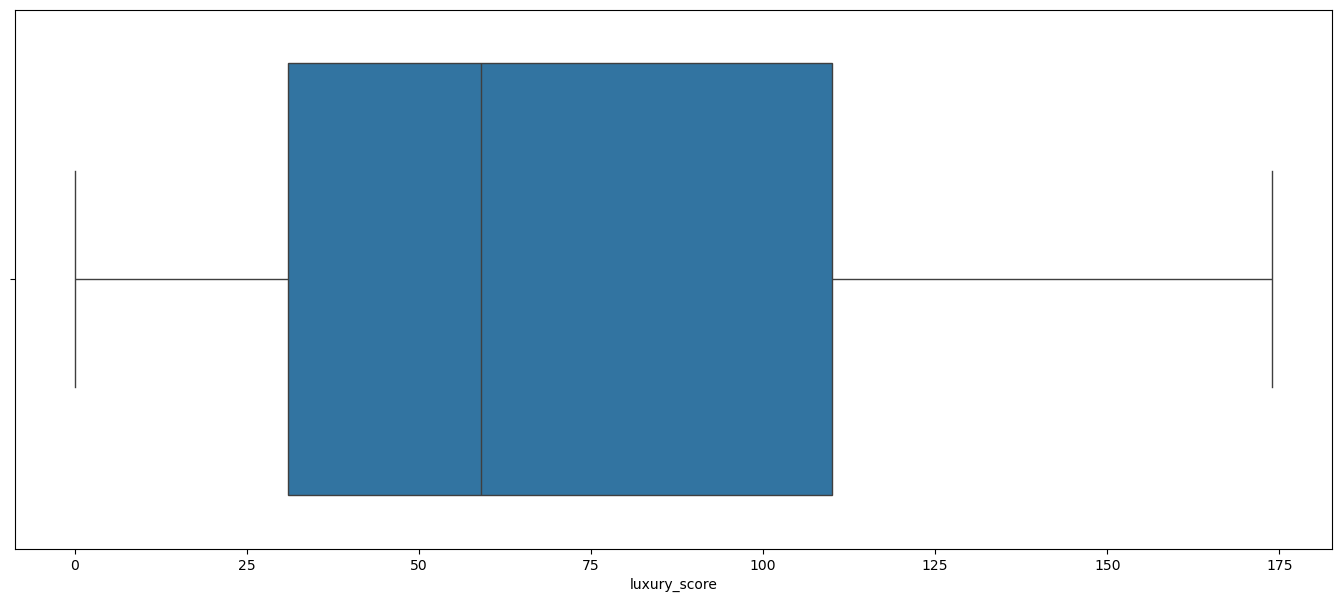

In [157]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['luxury_score'])
plt.show()

## price per sqft 
again checking for price per sqft, above we have changed or remove outliers in area columns

In [160]:
df['price_per_sqft'] = round(df['price']*10000000/df['area'])

C:\Users\Shubham\AppData\Local\Temp\ipykernel_15772\3913081489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = round(df['price']*10000000/df['area'])


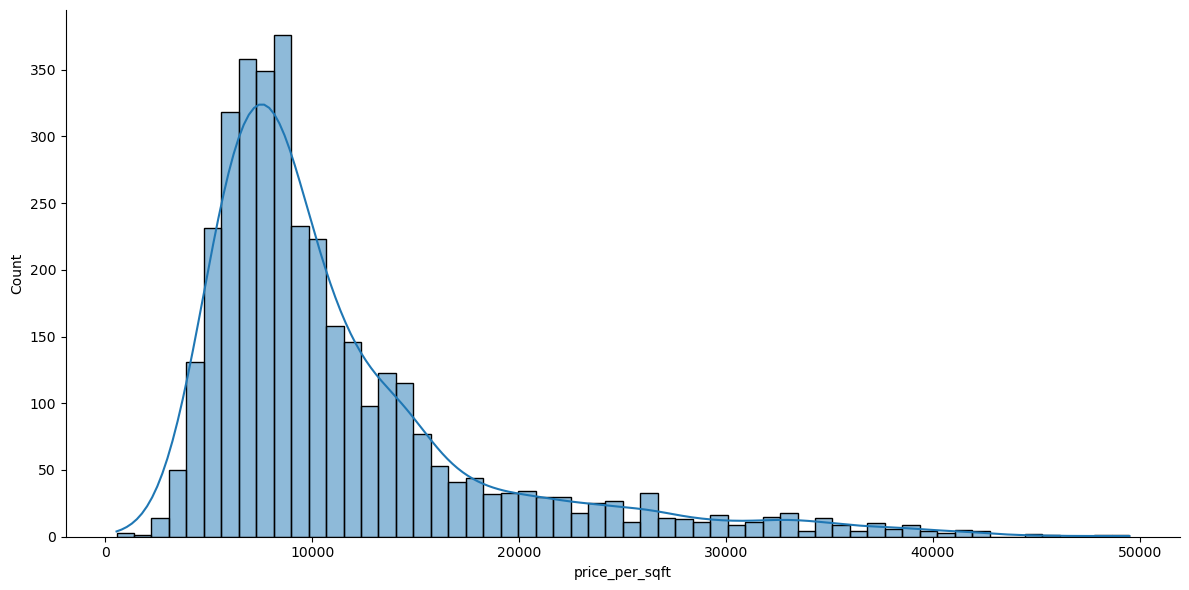

In [163]:
sns.displot(df['price_per_sqft'], kde = True, height = 6, aspect = 2)
plt.show()

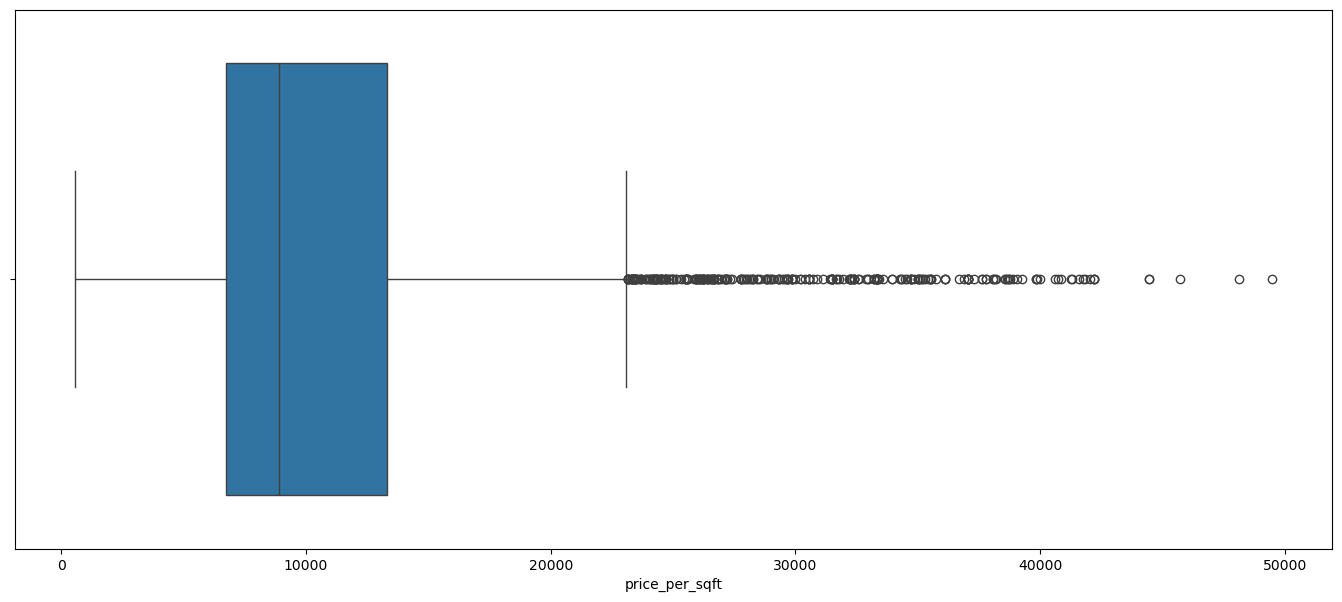

In [162]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['price_per_sqft'])
plt.show()

In [164]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
1057,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,1,0,0,1,7
1308,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,1,0,1,0,0,1,88
2010,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
2485,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,1,0,1,1,0,1,60
2727,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0
2900,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
3359,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
3460,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,1,0,1,0,0,2,97
3572,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103


In [176]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(250.25)

In [177]:
df[(df['area']/df['bedRoom']) < 250]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
3,flat,signature global solera,sector 107,0.27,5521.0,489.0,Carpet area: 489 (45.43 sq.m.),2,2,2,0.0,North-East,Relatively New,NaN,NaN,489.000000,0,0,0,0,0,0,45
30,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,1,0,1,1,0
47,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0
56,flat,signature global solera,sector 107,0.28,5833.0,480.0,Carpet area: 489 (45.43 sq.m.),2,2,2,0.0,North-East,Relatively New,NaN,NaN,489.000000,0,0,0,0,0,0,45
69,house,independent,sector 23,3.65,23443.0,1557.0,Plot area 173(144.65 sq.m.),9,9,3+,3.0,West,New Property,NaN,1557.0,NaN,1,0,1,0,0,1,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,flat,prime habitat,sector 99,0.27,5433.0,497.0,Carpet area: 497 (46.17 sq.m.),2,2,1,4.0,North-East,New Property,NaN,NaN,497.000000,0,0,0,0,0,0,7
3657,house,independent,sector 3,0.80,8155.0,981.0,Plot area 109(91.14 sq.m.),5,4,1,2.0,NaN,Moderately Old,NaN,981.0,NaN,0,0,0,0,0,0,0
3660,flat,mvn athens,sohna road,0.27,5895.0,458.0,Carpet area: 457.81 (42.53 sq.m.),2,2,1,4.0,South-East,Relatively New,NaN,NaN,457.788667,0,0,0,0,1,1,35
3661,house,independent,sector 5,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.000000,0,0,0,0,0,0,0


area is too much as compared to bedroom eg. area 565 having bedroom 5, which is considered as a data error

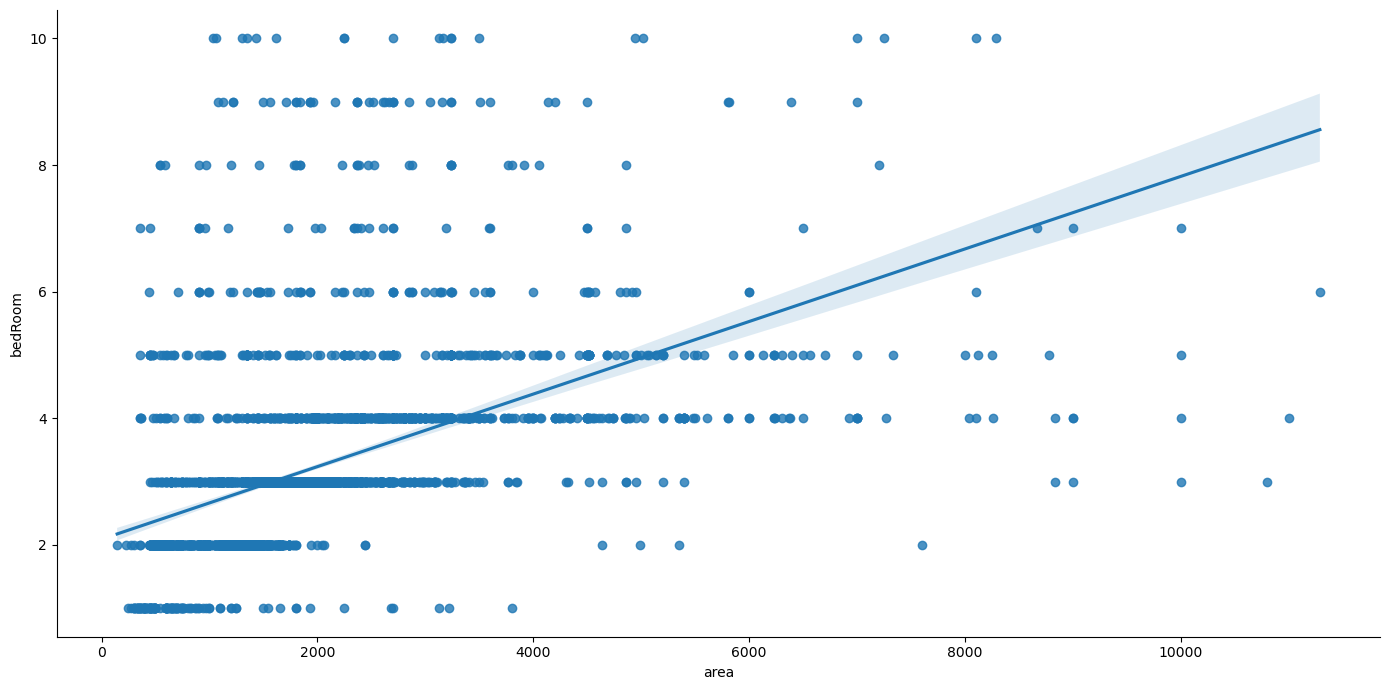

In [175]:
sns.lmplot(data = df, x = 'area', y = 'bedRoom', height = 7, aspect = 2)
plt.show()

In [178]:
df['area_room_ratio'] = df['area']/df['bedRoom']

C:\Users\Shubham\AppData\Local\Temp\ipykernel_15772\465686754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [182]:
df.sort_values(by = 'area_room_ratio', ascending = True).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,area_room_ratio
683,house,independent,sector 28,0.75,20833.0,360.0,Plot area 40(33.45 sq.m.),7,4,3+,4.0,NaN,Moderately Old,NaN,360.0,NaN,0,0,0,0,0,0,7,51.428571
2344,house,ashok vihar phase iii extension,sector 5,0.40,8889.0,450.0,Plot area 50(41.81 sq.m.),7,4,3+,4.0,NaN,New Property,NaN,450.0,NaN,0,0,1,0,0,0,7,64.285714
2943,house,ansal,sector 43,1.85,34259.0,540.0,Plot area 60(5.57 sq.m.),8,8,3+,5.0,North-West,Relatively New,NaN,60.0,NaN,0,0,0,0,0,0,53,67.500000
878,house,independent,sector 105,0.60,11111.0,540.0,Plot area 60(50.17 sq.m.),8,4,3,3.0,West,New Property,NaN,540.0,NaN,0,0,0,0,0,0,17,67.500000
609,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5,3,3,3.0,NaN,Old Property,NaN,360.0,NaN,0,0,0,0,0,0,0,72.000000
3212,house,independent,sector 88,0.32,22069.0,145.0,Built Up area: 145 (13.47 sq.m.),2,2,0,3.0,NaN,Undefined,NaN,145.0,NaN,0,0,0,0,0,0,0,72.500000
3004,house,independent,sector 8,0.49,11239.0,436.0,Plot area 360(33.45 sq.m.),6,3,2,3.0,East,Moderately Old,NaN,360.0,NaN,0,0,0,0,0,0,8,72.666667
3662,house,sector 38 rwa,sector 38,1.40,23932.0,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8,8,3,4.0,East,Moderately Old,NaN,62.0,60.0,0,0,0,0,1,1,40,73.125000
3281,house,rajendra park gurgaon,sector 105,0.37,10278.0,360.0,Plot area 360(33.45 sq.m.),4,3,2,3.0,East,Relatively New,NaN,360.0,NaN,0,0,0,0,0,0,0,90.000000
2229,house,ss omnia,sector 86,0.42,9333.0,450.0,Plot area 50(4.65 sq.m.),5,3,2,3.0,NaN,Relatively New,NaN,50.0,NaN,0,0,0,0,0,0,0,90.000000


In [183]:
df[df['area_room_ratio'] < 100]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,area_room_ratio
280,house,independent,sector 5,0.50,11111.0,450.0,Plot area 450(41.81 sq.m.),5,3,3,3.0,NaN,Moderately Old,NaN,450.0,NaN,0,0,0,0,0,0,0,90.000000
609,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5,3,3,3.0,NaN,Old Property,NaN,360.0,NaN,0,0,0,0,0,0,0,72.000000
683,house,independent,sector 28,0.75,20833.0,360.0,Plot area 40(33.45 sq.m.),7,4,3+,4.0,NaN,Moderately Old,NaN,360.0,NaN,0,0,0,0,0,0,7,51.428571
806,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4,4,2,4.0,North,Moderately Old,NaN,NaN,1500.0,0,0,0,0,0,1,7,92.500000
878,house,independent,sector 105,0.60,11111.0,540.0,Plot area 60(50.17 sq.m.),8,4,3,3.0,West,New Property,NaN,540.0,NaN,0,0,0,0,0,0,17,67.500000
910,house,rattan garden,sector 7,0.83,17585.0,472.0,Carpet area: 472 (43.85 sq.m.),5,3,2,3.0,East,Undefined,NaN,NaN,472.0,0,0,0,0,0,0,0,94.400000
1822,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5,3,2,2.0,East,Old Property,NaN,477.0,NaN,0,0,0,0,0,0,8,95.400000
2229,house,ss omnia,sector 86,0.42,9333.0,450.0,Plot area 50(4.65 sq.m.),5,3,2,3.0,NaN,Relatively New,NaN,50.0,NaN,0,0,0,0,0,0,0,90.000000
2344,house,ashok vihar phase iii extension,sector 5,0.40,8889.0,450.0,Plot area 50(41.81 sq.m.),7,4,3+,4.0,NaN,New Property,NaN,450.0,NaN,0,0,1,0,0,0,7,64.285714
2653,house,independent,sector 28,0.45,10000.0,450.0,Built Up area: 50 (4.65 sq.m.),5,3,0,1.0,NaN,Undefined,NaN,50.0,NaN,0,0,0,0,0,0,0,90.000000


In [186]:
df[df['area_room_ratio'] < 100].shape

(0, 24)

area to room ratio is less than 100, these are outliers drop these rows


In [185]:
df = df[df['area_room_ratio'] > 100]

In [190]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [194]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\Shubham\AppData\Local\Temp\ipykernel_15772\3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [195]:
df.update(outliers_df)

In [197]:
df['area_room_ratio'] = df['area']/df['bedRoom']

C:\Users\Shubham\AppData\Local\Temp\ipykernel_15772\465686754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [198]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,area_room_ratio
30,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,1,0,1,1,0,225.000000
47,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
127,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
208,house,independent,sector 88,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
1043,house,independent,sector 1,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667
1185,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
1225,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
1258,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,1,0,0,0,29,120.600000
2439,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,1,0,0,0,8,200.000000
2656,house,independent,sector 5,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000


In [199]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(13, 24)

In [202]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

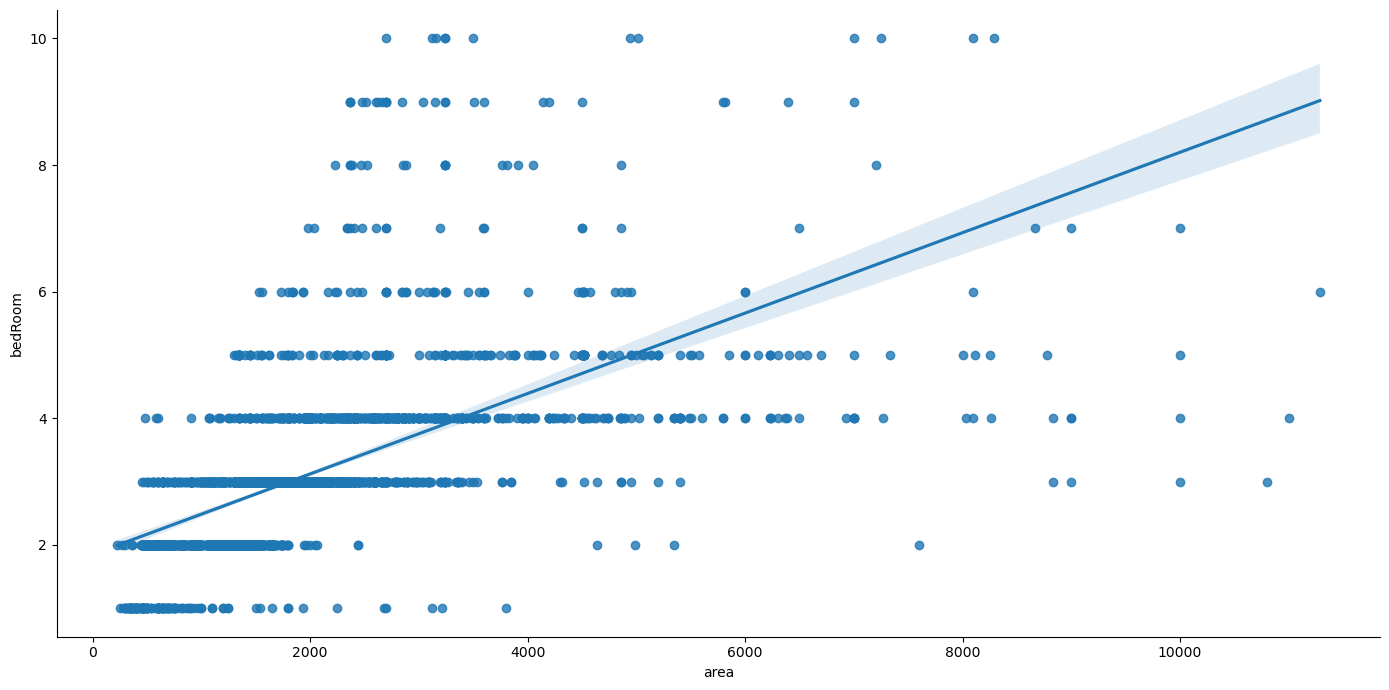

In [203]:
sns.lmplot(data = df, x = 'area', y = 'bedRoom', height = 7, aspect = 2)
plt.show()

In [204]:
df.shape

(3566, 24)

In [208]:
df.sample(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,area_room_ratio
812,flat,signature global solera,sector 107,0.28,5833.0,480.0,Carpet area: 489 (45.43 sq.m.),2,2,2,11.0,South,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45,240.000000
511,flat,guru gram haryana cghs,sector 56,1.39,8424.0,1650.0,Super Built up area 1850(171.87 sq.m.)Built Up...,3,2,3,6.0,South,Old Property,1850.0,1750.0,1650.0,1,0,1,0,0,1,89,550.000000
3248,house,unitech espace,sector 50,7.45,34491.0,2160.0,Plot area 240(200.67 sq.m.)Built Up area: 4500...,4,4,3,3.0,NaN,Old Property,NaN,4500.0,4000.0,1,0,0,0,0,1,59,540.000000
1921,flat,signature global solera,sector 107,0.25,7862.0,318.0,Built Up area: 318 (29.54 sq.m.),1,1,0,0.0,NaN,Undefined,NaN,318.0,NaN,0,0,0,0,0,0,55,318.000000
145,flat,dlf park place,sector 54,6.75,24963.0,2704.0,Super Built up area 2704(251.21 sq.m.)Carpet a...,4,4,2,8.0,North,Moderately Old,2704.0,NaN,1534.0,1,0,0,0,0,2,135,676.000000
1570,flat,kiran residency,sector 56,1.50,7500.0,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3,3,3+,4.0,North,Relatively New,2000.0,1900.0,1800.0,1,0,0,0,0,1,126,666.666667
3239,flat,krisumi waterfall residences,sector 36,4.10,15501.0,2645.0,Carpet area: 2538 (235.79 sq.m.),3,4,3,30.0,NaN,New Property,NaN,NaN,2538.0,0,1,0,0,0,2,49,881.666667
2841,house,ss aaron ville,sector 49,6.75,15000.0,4500.0,Built Up area: 4500 (418.06 sq.m.),5,4,2,2.0,North,New Property,NaN,4500.0,NaN,0,0,0,0,1,0,49,900.000000
1136,flat,tulip monsella,sector 53,5.60,19364.0,2892.0,Super Built up area 2892(268.68 sq.m.),3,3,3+,1.0,NaN,Undefined,2892.0,NaN,NaN,0,0,0,0,0,0,42,964.000000
459,house,independent,sector 9,1.25,8735.0,1431.0,Plot area 159(132.94 sq.m.),3,6,3+,3.0,NaN,Old Property,NaN,1431.0,NaN,0,0,0,0,0,0,0,477.000000


In [210]:
df.to_csv('gurgaon-outlier-treated.csv', index = False)